In [0]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA



In [0]:
lfw_dataset=datasets.fetch_lfw_people(min_faces_per_person=100)

print(lfw_dataset.images.shape)


(1140, 62, 47)


In [0]:

print(lfw_dataset.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [0]:
print(lfw_dataset.target)

[2 3 1 ... 4 2 4]


In [0]:
n_samples,h,w=lfw_dataset.images.shape
X=lfw_dataset.data
Y=lfw_dataset.target

target_names=lfw_dataset.target_names

print(target_names.shape)

(5,)


In [0]:
print(n_samples,h,w)

1140 62 47


In [0]:
n_features=X.shape[1]  #no. of pixels==no.of features
n_classes=target_names.shape[0]
print("Info on Dataset")
print("n_samples -",n_samples)
print("n_features -",n_features)
print("n_classes -",n_classes)

Info on Dataset
n_samples - 1140
n_features - 2914
n_classes - 5


In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


n_components = 100


      % (n_components, X_train.shape[0]))

Extracting the top 100 eigenfaces from 798 faces


In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


n_components = 100

from time import time
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

print("done in %0.3fs" % (time() - t0))

# as pca.compoments.shape =(100,2194)  so we need to reshape that into original h,w in order to see them s 

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.206s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.026s


In [0]:
print(pca.explained_variance_ratio_)

[0.18494622 0.14778632 0.07182531 0.05982777 0.0515078  0.03191011
 0.02457394 0.02154545 0.02005126 0.01834561 0.01569985 0.01455962
 0.01286739 0.01103838 0.00992173 0.00963222 0.00943543 0.0084668
 0.00833957 0.00714859 0.00672301 0.00669782 0.00632742 0.00577737
 0.00568515 0.00520327 0.00503244 0.00498299 0.00453322 0.00446511
 0.00400241 0.00391895 0.00376361 0.00362608 0.00342259 0.00339282
 0.00326151 0.00318323 0.00307996 0.00302881 0.0028776  0.00275828
 0.00265376 0.0025853  0.00252436 0.00251618 0.00241115 0.0023757
 0.00229582 0.00223078 0.00217998 0.00211974 0.00203814 0.00199793
 0.00197985 0.00195683 0.00190455 0.00186958 0.00183499 0.00169389
 0.00169193 0.00166742 0.00162951 0.00161334 0.00159262 0.00156782
 0.00152826 0.00147057 0.00146046 0.00144629 0.0013988  0.00134551
 0.0013269  0.00130342 0.00127908 0.00123671 0.00120766 0.00119961
 0.00119094 0.00116785 0.00114648 0.00113    0.00111555 0.00108312
 0.00106825 0.00104416 0.00102921 0.00101952 0.00097729 0.000952

In [0]:

max_var=0.80
sum=0
count=0;

for i in pca.explained_variance_ratio_:
  sum=sum+i
  count=count+1
  if(sum>=max_var):
    break


print("BY CHOOSING 100 eigen vectors(pc's/eigen directions/eigen faces) I am able to explain  ")

lim=100
count1=0
ans=0
for i in pca.explained_variance_ratio_:
  ans+=i
  count1=count1+1
  if(count1==100):
    break


print(ans,"% of total variance")

print("No. of eigen vectors required to explain 80 % variance : - ", count)

print("Exact percentage of varaince explained by 32 :- ", sum)






BY CHOOSING 100 eigen vectors(pc's/eigen directions/eigen faces) I am able to explain  
0.9219948368263431 % of total variance
No. of eigen vectors required to explain 80 % variance : -  32
Exact percentage of varaince explained by 32 :-  0.8027785634621978


In [0]:
def plot_gallery(images, h, w, n_row=4, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        #plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


Top 20 eigen faces : -
(100, 62, 47)


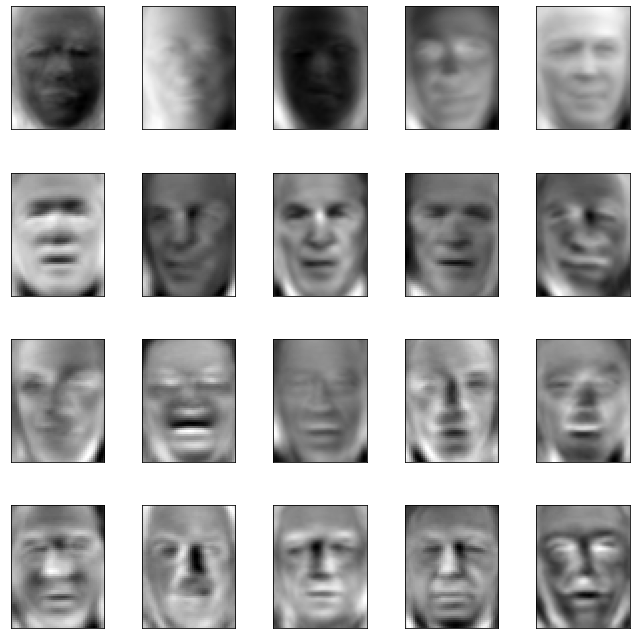

In [0]:

# plot the gallery of the most significative eigenfaces

print("Top 20 eigen faces : -")
plot_gallery(eigenfaces,  h, w)
print(eigenfaces.shape)



task-2
plotting images once they are projected to 100 dimensional eigen face space

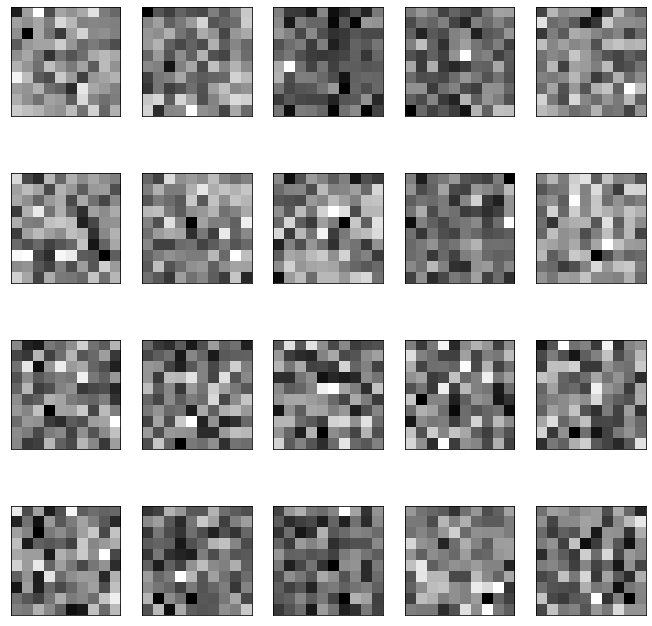

In [0]:


plot_gallery(X_train_pca,10,10)

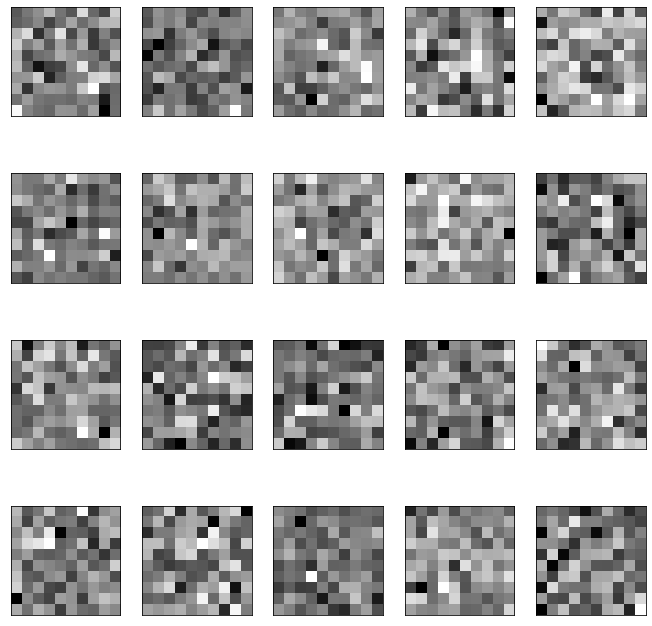

In [0]:
plot_gallery(X_test_pca,10,10)

In [0]:
print(lfw_dataset.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


picking colin powell , donald rumsfeld ,george W bush
ie
target -{0},{1},{2}

i suppose i want to visualize( training and test) images of certain people in in eigenface space... i can see that as img(as i know the values it has corresponding to all those eigen faces) ,but i cant plot it as a point in 100 dim space.
So by applying tsne i will again reduce the dimensions to let say 2/3 to visualize those points , as tsne will maintain the clusters while creating the embedding .

In [0]:
from sklearn.manifold import TSNE



In [0]:


cnt0=0
cnt1=0
cnt2=0
cnt3=0
cnt4=0

for i in range(n_samples):
  if(Y[i]==0):
    cnt0=cnt0+1
  elif(Y[i]==1):
    cnt1=cnt1+1
  elif(Y[i]==2):
    cnt2=cnt2+1
  elif(Y[i]==3):
    cnt3=cnt3+1
  else:
    cnt4=cnt4+1

print(cnt0,cnt1,cnt2,cnt3,cnt4)
print(target_names)

236 121 530 109 144
['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [0]:
X_subset=np.array( [X[0]] )
Y_subset=np.array([2])
print(X_subset.shape)

cntrest=0
for i in range(1,n_samples):
  if(Y[i]==1 or Y[i]==3 or Y[i]==4 ):
    #print(X[i].shape )
    Y_subset=np.append(Y_subset, [Y[i]],axis=0)
    X_subset=np.append(X_subset, [X[i]],axis=0)
  else:
    cntrest=cntrest+1

print(X_subset.shape)
print(cntrest)
print(Y_subset.shape)

(1, 2914)
(375, 2914)
765
(375,)


X_subset contains classes 1,3,4:
both train and test images.
This is created to visualize them as a scatter plot , but cant apply tsne directly when there are so many features so first applying pca to reduce dimensions to 100 (where the new features are combination of previous 2914 pixels (eigen faces)) . Then converting them to 3 dimensions to visualize.

In [0]:
X_subset_pca= PCA(n_components=100, svd_solver='randomized',
          whiten=True).fit_transform(X_subset)

In [0]:
X_subset_pca_embedding=TSNE(n_components=3).fit_transform(X_subset_pca)

In [0]:
print(X_subset_pca_embedding.shape)

(375, 3)


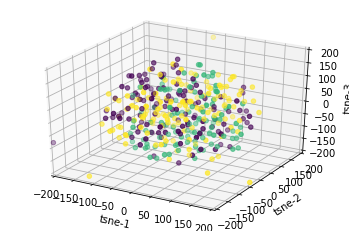

In [0]:
tsne1=X_subset_pca_embedding[:,0]
tsne2=X_subset_pca_embedding[:,1]
tsne3=X_subset_pca_embedding[:,2]
# Dataset
df=pd.DataFrame()
df['X']=tsne1
df['Y']=tsne2
df['Z']=tsne3
df['color']=Y_subset
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'],zdir='z', c=df['color'],)

ax.set_xlim3d(-200,200)
ax.set_ylim3d(-200,200)
ax.set_zlim3d(-200,200)
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_zlabel("tsne-3")

#ax.view_init(30, 185)
plt.show()

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


n_components = 100

from time import time
t0 = time()
pca = PCA(n_components=100).fit(X)

print("done in %0.3fs" % (time() - t0))





t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


done in 0.410s


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_pca, y_train)
pred_classes=neigh.predict(X_test_pca)

print(neigh.score(X_test_pca,y_test))
print(classification_report(pred_classes,y_test))

for i in range(5):
  print(i,target_names[i])

0.5964912280701754
              precision    recall  f1-score   support

           0       0.55      0.51      0.53        67
           1       0.55      0.44      0.49        39
           2       0.69      0.75      0.72       158
           3       0.44      0.52      0.48        29
           4       0.44      0.41      0.43        49

    accuracy                           0.60       342
   macro avg       0.54      0.52      0.53       342
weighted avg       0.59      0.60      0.59       342

0 Colin Powell
1 Donald Rumsfeld
2 George W Bush
3 Gerhard Schroeder
4 Tony Blair


In [0]:
# as seen above 32 eigen faces(eigendir/pc's/eigen vectors) are required to explain around 80 % variance of the original data so let's try to build a knn classifier by keeping that much eigen faces only



X_pca32=PCA(n_components=32).fit_transform(X)
# split into a training and testing set
X_train_pca32, X_test_pca32, y_train, y_test = train_test_split(X_pca32, Y, test_size=0.30)



In [0]:

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train_pca32, y_train)
pred_classes=neigh.predict(X_test_pca32)

print(neigh.score(X_test_pca32,y_test))
print(classification_report(pred_classes,y_test))

for i in range(5):
  print(i,target_names[i])

0.5584795321637427
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        77
           1       0.54      0.39      0.45        51
           2       0.65      0.70      0.67       148
           3       0.25      0.43      0.32        21
           4       0.42      0.36      0.39        45

    accuracy                           0.56       342
   macro avg       0.49      0.49      0.48       342
weighted avg       0.57      0.56      0.56       342

0 Colin Powell
1 Donald Rumsfeld
2 George W Bush
3 Gerhard Schroeder
4 Tony Blair




---





---



TASK-2

In [0]:
from sklearn import datasets
iris_data=datasets.load_iris(return_X_y=True)


,0
0,"[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [0]:
import pandas as pd
X_iris=iris_data[0]


In [0]:
(X_iris[0]).shape
X_iris.shape

(150, 4)

In [0]:
Y_iris=iris_data[1]
Y_iris

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


Task -2 --> # 3 pairs of two classes , transform data of each pair(4 dim ) to 1 dimension.

Then finally transform whole data(everyclass)-(4dim) to 2 dim..

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_irisd=sc.fit_transform(X_iris)
X_irisd[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [0]:
sepal_length=[]
sepal_width=[]
petal_length=[]
petal_width=[]
for i in X_irisd:
  sepal_length.append(i[0])
  sepal_width.append(i[1])
  petal_length.append(i[2])
  petal_width.append(i[3])


In [0]:
from sklearn.decomposition import PCA

pcawd=PCA(n_components=2,svd_solver='randomized').fit(X_iris)
pcafi=PCA(n_components=2,svd_solver='randomized').fit(X_irisd)

pcafi.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [0]:
pcawd.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [0]:
pcafi.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [0]:

pca_iris=pcafi.fit_transform(X_irisd)

pc1=[]
pc2=[]


for i in pca_iris:
  pc1.append(i[0])
  pc2.append(i[1])

Text(0.5, 1.0, 'Iris Data projected along direction with max variance')

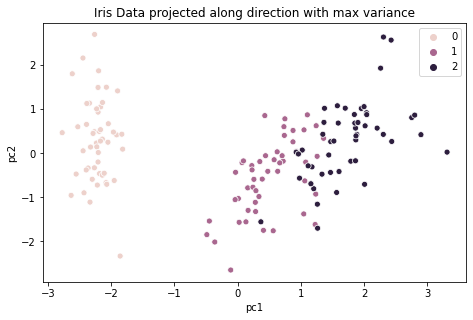

In [0]:
import seaborn as sns

plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
sns.scatterplot(pc1,pc2,hue=Y_iris)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("Iris Data projected along direction with max variance")



Text(0.5, 1.0, 'Sepal length')

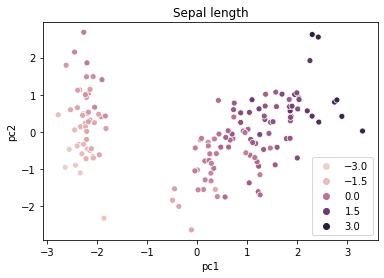

In [0]:
sns.scatterplot(pc1,pc2,hue=sepal_length )
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("Sepal length")

Text(0.5, 1.0, 'Sepal width')

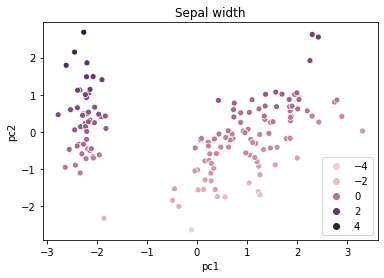

In [0]:
sns.scatterplot(pc1,pc2,hue=sepal_width )
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("Sepal width")

Text(0.5, 1.0, 'Petal length')

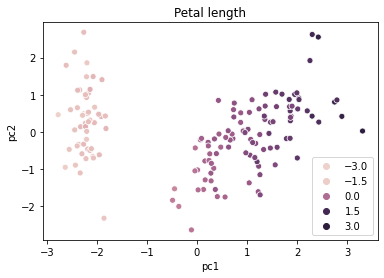

In [0]:
sns.scatterplot(pc1,pc2,hue=petal_length )
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("Petal length")

Text(0.5, 1.0, 'Petal width')

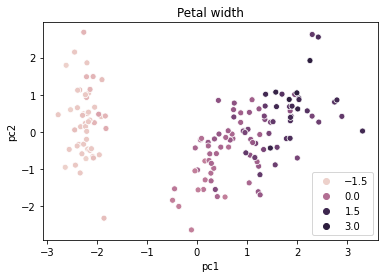

In [0]:
sns.scatterplot(pc1,pc2,hue=petal_width)
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("Petal width")

In [0]:
import numpy as np
#classes->(0,1)
X_irisp1=np.array([X_iris[0]])

Y_irisp1=np.array([Y_iris[0]])

#classes->(1,2)
X_irisp2=np.array([X_iris[50]])
Y_irisp2=np.array([Y_iris[50]])

#classes->(0,2)
X_irisp3=np.array([X_iris[0]])
Y_irisp3=np.array([Y_iris[0]])

count=0
for i in range(1,50):
  X_irisp1 = np.append(X_irisp1 , [X_iris[i]] , axis=0)
  Y_irisp1 = np.append(Y_irisp1 , [Y_iris[i]] ,axis=0 )
  
  X_irisp3 = np.append(X_irisp3 , [X_iris[i]] , axis=0)
  Y_irisp3 = np.append(Y_irisp3 , [Y_iris[i]] ,axis=0 )

for i in range(51,100):
  X_irisp2 = np.append(X_irisp2 , [X_iris[i]] , axis=0)
  Y_irisp2 = np.append(Y_irisp2 , [Y_iris[i]] ,axis=0 )
  
  X_irisp1 = np.append(X_irisp1 , [X_iris[i]] , axis=0)
  Y_irisp1 = np.append(Y_irisp1 , [Y_iris[i]] ,axis=0 )

for i in range(100,150):
  X_irisp2 = np.append(X_irisp2 , [X_iris[i]] , axis=0)
  Y_irisp2 = np.append(Y_irisp2 , [Y_iris[i]] ,axis=0 )
  
  X_irisp3 = np.append(X_irisp3 , [X_iris[i]] , axis=0)
  Y_irisp3 = np.append(Y_irisp3 , [Y_iris[i]] ,axis=0 )





X_irisp1 = np.append( X_irisp1, [X_iris[50]] , axis=0)
Y_irisp1 = np.append(Y_irisp1, [Y_iris[50]], axis=0)

print(X_irisp1.shape)
print(Y_irisp1.shape)
print(X_irisp2.shape)
print(Y_irisp2.shape)
print(X_irisp3.shape)
print(Y_irisp3.shape)


(100, 4)
(100,)
(100, 4)
(100,)
(100, 4)
(100,)


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=1)

X_ldap1=lda.fit_transform(X_irisp1,Y_irisp1)

X_ldap2=lda.fit_transform(X_irisp2,Y_irisp2)

X_ldap3=lda.fit_transform(X_irisp3,Y_irisp3)




In [0]:
print(X_ldap1.shape)
print(X_ldap2.shape)
print(X_ldap3.shape)


(100, 1)
(100, 1)
(100, 1)


(100,)
-4.440892098500626e-16


Text(0.5, 1.0, 'Pair-1 - Class 0 and 1')

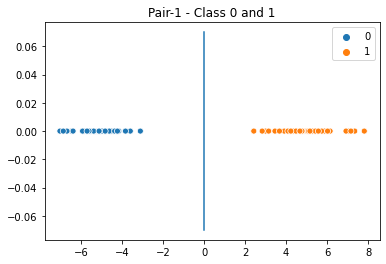

In [0]:
import seaborn as sns
zeroes=np.array([0])
for i in range(1,100):
  zeroes= np.append(zeroes,[0],axis=0)

print(zeroes.shape)

sns.scatterplot(X_ldap1,zeroes,hue=Y_irisp1)


c1=0
c2=0
for indices in range(0,100):
  if(Y_irisp1[indices]==0):
    c1=c1+X_ldap1[indices]
  if(Y_irisp1[indices]==1):
    c2=c2+X_ldap1[indices]

c1=c1/50
c2=c2/50
v=(c1+c2)/2
print(v)
plt.plot([v,v],[-0.07,0.07])
plt.title("Pair-1 - Class 0 and 1")




In [0]:
X_ldap1=X_ldap1.reshape((100,))
print(X_ldap1.shape)
X_ldap2=X_ldap2.reshape((100,))
print(X_ldap2.shape)
X_ldap3=X_ldap3.reshape((100,))
print(X_ldap3.shape)

(100,)
(100,)
(100,)


In [0]:
Y_irisp2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

-4.440892098500626e-16


Text(0.5, 1.0, 'Pair-2 - Class 1 and 2')

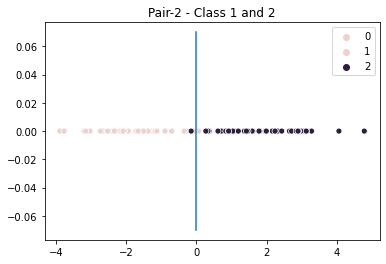

In [0]:
sns.scatterplot(X_ldap2,zeroes,hue=Y_irisp2)

c1=0
c2=0
for indices in range(0,100):
  if(Y_irisp2[indices]==1):
    c1=c1+X_ldap1[indices]
  if(Y_irisp2[indices]==2):
    c2=c2+X_ldap1[indices]

c1=c1/50
c2=c2/50
v=(c1+c2)/2
print(v)
plt.plot([v,v],[-0.07,0.07])
plt.title("Pair-2 - Class 1 and 2")


-4.440892098500626e-16


Text(0.5, 1.0, 'Pair-3 - Class 0 and 2')

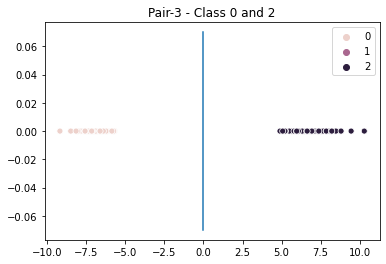

In [0]:

sns.scatterplot(X_ldap3,zeroes,hue=Y_irisp3)

c1=0
c2=0
for indices in range(0,100):
  if(Y_irisp3[indices]==0):
    c1=c1+X_ldap1[indices]
  if(Y_irisp3[indices]==2):
    c2=c2+X_ldap1[indices]

c1=c1/50
c2=c2/50
v=(c1+c2)/2
print(v)
plt.plot([v,v],[-0.07,0.07])
plt.title("Pair-3 - Class 0 and 2")

In [0]:


lda=LinearDiscriminantAnalysis(n_components=2)

X_lda=lda.fit_transform(X_iris,Y_iris)

In [0]:
lda1=[]
lda2=[]

for i in X_lda:
  lda1.append(i[0])
  lda2.append(i[1])

print(len(lda1))

150


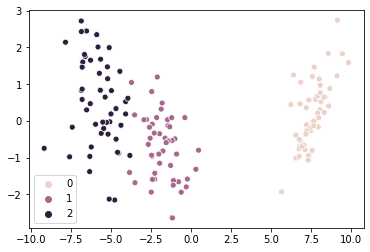

In [0]:
sns.scatterplot(lda1,lda2,hue=Y_iris)



---



In [0]:
print(X_iris.shape)

(150, 4)


In [0]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [0]:
X_tsne3eu=TSNE(n_components=3,metric='euclidean').fit_transform(X_iris)
X_tsne2eu=TSNE(n_components=2,metric='euclidean').fit_transform(X_iris)


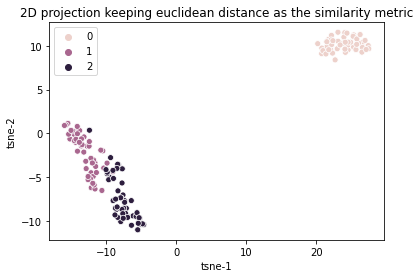

In [0]:
tsne1=X_tsne2eu[:,0]
tsne2=X_tsne2eu[:,1]

sns.scatterplot(tsne1,tsne2,hue=Y_iris)
#ax.view_init(30, 185)
plt.xlabel("tsne-1")
plt.ylabel("tsne-2")
plt.title("2D projection keeping euclidean distance as the similarity metric")
plt.show()

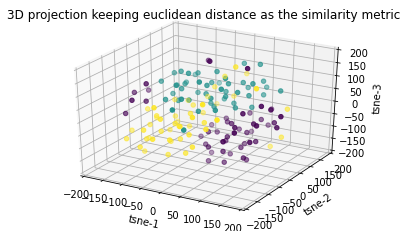

In [0]:
tsne1=X_tsne3eu[:,0]
tsne2=X_tsne3eu[:,1]
tsne3=X_tsne3eu[:,2]
# Dataset
df=pd.DataFrame()
df['X']=tsne1
df['Y']=tsne2
df['Z']=tsne3
df['color']=Y_iris
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'],zdir='z', c=df['color'])

ax.set_xlim3d(-200,200)
ax.set_ylim3d(-200,200)
ax.set_zlim3d(-200,200)
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_zlabel("tsne-3")

plt.title("3D projection keeping euclidean distance as the similarity metric")

#ax.view_init(30, 185)
plt.show()

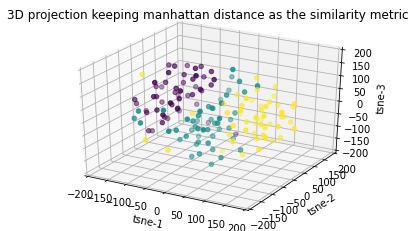

In [0]:

X_tsne3ma=TSNE(n_components=3,metric='manhattan').fit_transform(X_iris)
X_tsne2ma=TSNE(n_components=2,metric='manhattan').fit_transform(X_iris)

tsne1=X_tsne3ma[:,0]
tsne2=X_tsne3ma[:,1]
tsne3=X_tsne3ma[:,2]
# Dataset
df=pd.DataFrame()
df['X']=tsne1
df['Y']=tsne2
df['Z']=tsne3
df['color']=Y_iris
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'],zdir='z', c=df['color'])

ax.set_xlim3d(-200,200)

ax.set_ylim3d(-200,200)
ax.set_zlim3d(-200,200)
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_zlabel("tsne-3")


plt.title("3D projection keeping manhattan distance as the similarity metric")

#ax.view_init(30, 185)
plt.show()

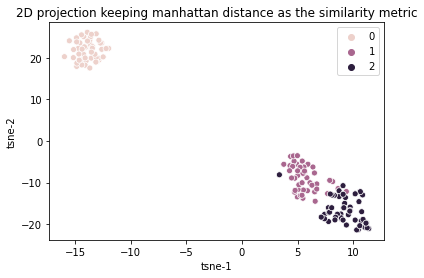

In [0]:
tsne1=X_tsne2ma[:,0]
tsne2=X_tsne2ma[:,1]

sns.scatterplot(tsne1,tsne2,hue=Y_iris)
#ax.view_init(30, 185)
plt.xlabel("tsne-1")
plt.ylabel("tsne-2")
plt.title("2D projection keeping manhattan distance as the similarity metric")
plt.show()

Task --- 3a

In [0]:
from sklearn import datasets
iris_data=datasets.load_iris(return_X_y=True)

In [0]:
X_svm=iris_data[0]
Y_svm=iris_data[1]

In [0]:
X_svm_subset=X_svm[:,:2]


In [0]:
def plot_svc(train_x, test_x, train_y, test_y, C = 1.0 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica']):
    clf = SVC(kernel=kernel, C=C)
    clf.fit(train_x, train_y)
    fig = plt.figure()
    ax = fig.add_subplot()
    X0, X1 = train_x[:,0] , train_x[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plt.axis([train_x[:,0].min() - 1, train_x[:,0].max()+1, train_x[:,1].min() - 1, train_x[:,1].max()+1])
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(train_x[:, 0], train_x[:, 1], c=train_y, zorder=10, cmap=plt.cm.Paired,edgecolors='k')
    
        ax.plot(xx, yy_down, 'k--')
        ax.plot(xx, yy_up, 'k--')
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,facecolors='none', zorder=10, edgecolors='k')
        ax.plot(xx, yy, 'k-')
    predictions = clf.predict(test_x)
    cr = classification_report(test_y, predictions, species_labels, species_names)
   
    ax.set_title(title)
    plt.show()
    print(cr)

In [0]:
import numpy as np
#classes->(0,1)
X_svmp1=np.array([X_svm_subset[0]])

Y_svmp1=np.array([Y_svm[0]])

#classes->(1,2)
X_svmp2=np.array([X_svm_subset[50]])
Y_svmp2=np.array([Y_svm[50]])

#classes->(0,2)
X_svmp3=np.array([X_svm_subset[0]])
Y_svmp3=np.array([Y_svm[0]])

count=0
for i in range(1,50):
  X_svmp1 = np.append(X_svmp1 , [X_svm_subset[i]] , axis=0)
  Y_svmp1 = np.append(Y_svmp1 , [Y_svm[i]] ,axis=0 )
  
  X_svmp3 = np.append(X_svmp3 , [X_svm_subset[i]] , axis=0)
  Y_svmp3 = np.append(Y_svmp3 , [Y_svm[i]] ,axis=0 )

for i in range(51,100):
  X_svmp2 = np.append(X_svmp2 , [X_svm_subset[i]] , axis=0)
  Y_svmp2 = np.append(Y_svmp2 , [Y_svm[i]] ,axis=0 )
  
  X_svmp1 = np.append(X_svmp1 , [X_svm_subset[i]] , axis=0)
  Y_svmp1 = np.append(Y_svmp1 , [Y_svm[i]] ,axis=0 )

for i in range(100,150):
  X_svmp2 = np.append(X_svmp2 , [X_svm_subset[i]] , axis=0)
  Y_svmp2 = np.append(Y_svmp2 , [Y_svm[i]] ,axis=0 )
  
  X_svmp3 = np.append(X_svmp3 , [X_svm_subset[i]] , axis=0)
  Y_svmp3 = np.append(Y_svmp3 , [Y_svm[i]] ,axis=0 )





X_svmp1 = np.append( X_svmp1, [X_svm_subset[50]] , axis=0)
Y_svmp1 = np.append(Y_svmp1, [Y_svm[50]], axis=0)

print(X_svmp1.shape)
print(Y_svmp1.shape)
print(X_svmp2.shape)
print(Y_svmp2.shape)
print(X_svmp3.shape)
print(Y_svmp3.shape)


(100, 2)
(100,)
(100, 2)
(100,)
(100, 2)
(100,)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


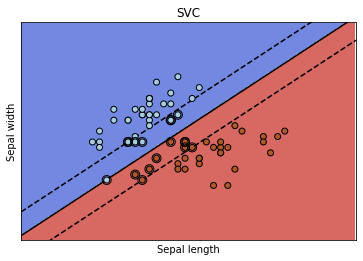

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        17
   virginica       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        30
   macro avg       0.67      0.67      0.67        30
weighted avg       1.00      1.00      1.00        30



In [0]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

X_svmp1_train,X_svmp1_test,Y_svmp1_train,Y_svmp1_test=train_test_split(X_svmp1,Y_svmp1,test_size=0.3)

plot_svc(X_svmp1_train, X_svmp1_test, Y_svmp1_train, Y_svmp1_test, C = 1.0 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


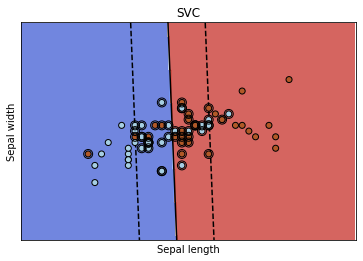

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         0
  versicolor       0.69      0.60      0.64        15
   virginica       0.65      0.73      0.69        15

   micro avg       0.67      0.67      0.67        30
   macro avg       0.45      0.44      0.44        30
weighted avg       0.67      0.67      0.67        30



In [40]:

X_svmp2_train,X_svmp2_test,Y_svmp2_train,Y_svmp2_test=train_test_split(X_svmp2,Y_svmp2,test_size=0.3)

plot_svc(X_svmp2_train, X_svmp2_test, Y_svmp2_train, Y_svmp2_test, C = 1.0 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


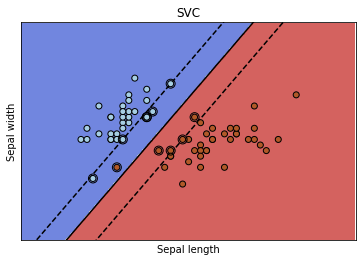

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.00      0.00      0.00         0
   virginica       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        30
   macro avg       0.67      0.67      0.67        30
weighted avg       1.00      1.00      1.00        30



In [42]:

X_svmp3_train,X_svmp3_test,Y_svmp3_train,Y_svmp3_test=train_test_split(X_svmp3,Y_svmp3,test_size=0.3)

plot_svc(X_svmp3_train, X_svmp3_test, Y_svmp3_train, Y_svmp3_test, C = 1.0 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


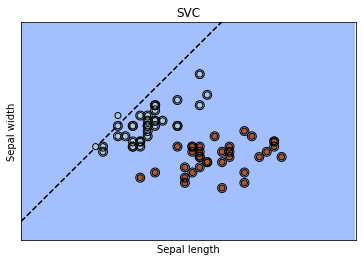

              precision    recall  f1-score   support

      setosa       0.47      1.00      0.64        14
  versicolor       0.00      0.00      0.00        16
   virginica       0.00      0.00      0.00         0

   micro avg       0.47      0.47      0.47        30
   macro avg       0.16      0.33      0.21        30
weighted avg       0.22      0.47      0.30        30



In [43]:
X_svmp1_train,X_svmp1_test,Y_svmp1_train,Y_svmp1_test=train_test_split(X_svmp1,Y_svmp1,test_size=0.3)

plot_svc(X_svmp1_train, X_svmp1_test, Y_svmp1_train, Y_svmp1_test, C = 0.001 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


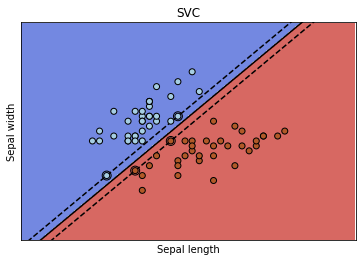

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        16
   virginica       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        30
   macro avg       0.67      0.67      0.67        30
weighted avg       1.00      1.00      1.00        30



In [44]:
X_svmp1_train,X_svmp1_test,Y_svmp1_train,Y_svmp1_test=train_test_split(X_svmp1,Y_svmp1,test_size=0.3)

plot_svc(X_svmp1_train, X_svmp1_test, Y_svmp1_train, Y_svmp1_test, C = 1000 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


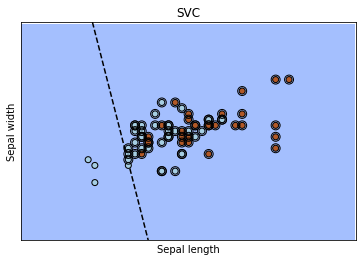

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         0
  versicolor       0.43      1.00      0.60        13
   virginica       0.00      0.00      0.00        17

   micro avg       0.43      0.43      0.43        30
   macro avg       0.14      0.33      0.20        30
weighted avg       0.19      0.43      0.26        30



In [45]:

X_svmp2_train,X_svmp2_test,Y_svmp2_train,Y_svmp2_test=train_test_split(X_svmp2,Y_svmp2,test_size=0.3)

plot_svc(X_svmp2_train, X_svmp2_test, Y_svmp2_train, Y_svmp2_test, C = 0.001 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


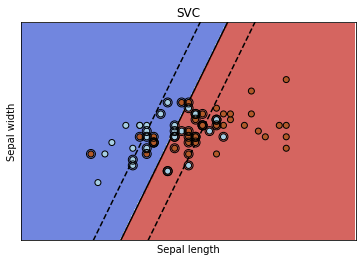

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         0
  versicolor       0.75      0.63      0.69        19
   virginica       0.50      0.64      0.56        11

   micro avg       0.63      0.63      0.63        30
   macro avg       0.42      0.42      0.42        30
weighted avg       0.66      0.63      0.64        30



In [46]:

X_svmp2_train,X_svmp2_test,Y_svmp2_train,Y_svmp2_test=train_test_split(X_svmp2,Y_svmp2,test_size=0.3)

plot_svc(X_svmp2_train, X_svmp2_test, Y_svmp2_train, Y_svmp2_test, C = 1000 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


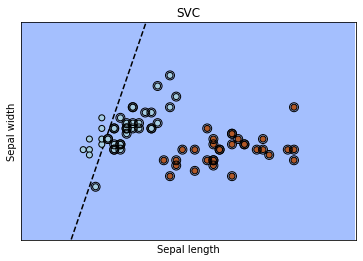

              precision    recall  f1-score   support

      setosa       0.37      1.00      0.54        11
  versicolor       0.00      0.00      0.00         0
   virginica       0.00      0.00      0.00        19

   micro avg       0.37      0.37      0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



In [47]:

X_svmp3_train,X_svmp3_test,Y_svmp3_train,Y_svmp3_test=train_test_split(X_svmp3,Y_svmp3,test_size=0.3)

plot_svc(X_svmp3_train, X_svmp3_test, Y_svmp3_train, Y_svmp3_test, C = 0.001 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


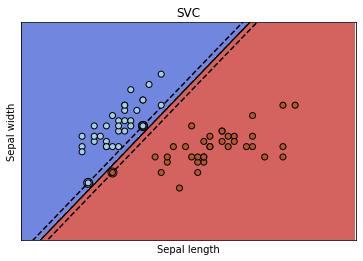

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.00      0.00      0.00         0
   virginica       1.00      1.00      1.00        14

   micro avg       1.00      1.00      1.00        30
   macro avg       0.67      0.67      0.67        30
weighted avg       1.00      1.00      1.00        30



In [48]:

X_svmp3_train,X_svmp3_test,Y_svmp3_train,Y_svmp3_test=train_test_split(X_svmp3,Y_svmp3,test_size=0.3)

plot_svc(X_svmp3_train, X_svmp3_test, Y_svmp3_train, Y_svmp3_test, C = 1000 , title = 'SVC', kernel='linear',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


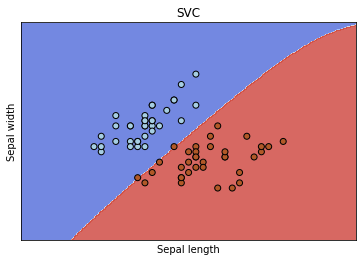

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        30
   macro avg       0.67      0.67      0.67        30
weighted avg       1.00      1.00      1.00        30



In [50]:
X_svmp1_train,X_svmp1_test,Y_svmp1_train,Y_svmp1_test=train_test_split(X_svmp1,Y_svmp1,test_size=0.3)

plot_svc(X_svmp1_train, X_svmp1_test, Y_svmp1_train, Y_svmp1_test, C = 0.001 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


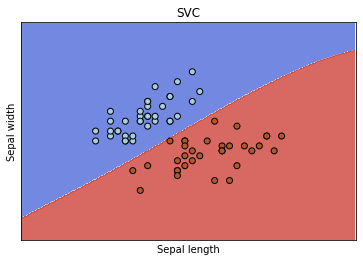

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        17
   virginica       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        30
   macro avg       0.67      0.67      0.67        30
weighted avg       1.00      1.00      1.00        30



In [51]:
X_svmp1_train,X_svmp1_test,Y_svmp1_train,Y_svmp1_test=train_test_split(X_svmp1,Y_svmp1,test_size=0.3)

plot_svc(X_svmp1_train, X_svmp1_test, Y_svmp1_train, Y_svmp1_test, C = 1 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


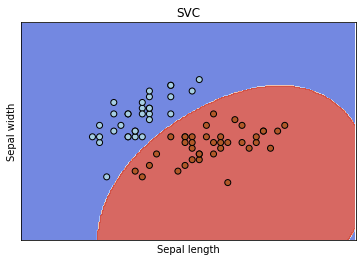

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00        12
   virginica       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00        30
   macro avg       0.67      0.67      0.67        30
weighted avg       1.00      1.00      1.00        30



In [52]:
X_svmp1_train,X_svmp1_test,Y_svmp1_train,Y_svmp1_test=train_test_split(X_svmp1,Y_svmp1,test_size=0.3)

plot_svc(X_svmp1_train, X_svmp1_test, Y_svmp1_train, Y_svmp1_test, C = 1000 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


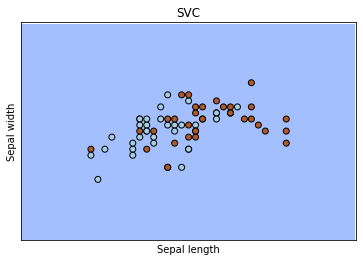

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         0
  versicolor       0.00      0.00      0.00        16
   virginica       0.47      1.00      0.64        14

   micro avg       0.47      0.47      0.47        30
   macro avg       0.16      0.33      0.21        30
weighted avg       0.22      0.47      0.30        30



In [54]:

X_svmp2_train,X_svmp2_test,Y_svmp2_train,Y_svmp2_test=train_test_split(X_svmp2,Y_svmp2,test_size=0.3)

plot_svc(X_svmp2_train, X_svmp2_test, Y_svmp2_train, Y_svmp2_test, C = 0.001 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


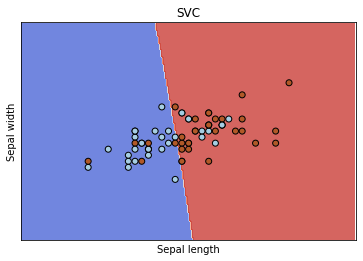

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         0
  versicolor       0.75      0.88      0.81        17
   virginica       0.80      0.62      0.70        13

   micro avg       0.77      0.77      0.77        30
   macro avg       0.52      0.50      0.50        30
weighted avg       0.77      0.77      0.76        30



In [55]:

X_svmp2_train,X_svmp2_test,Y_svmp2_train,Y_svmp2_test=train_test_split(X_svmp2,Y_svmp2,test_size=0.3)

plot_svc(X_svmp2_train, X_svmp2_test, Y_svmp2_train, Y_svmp2_test, C = 1 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


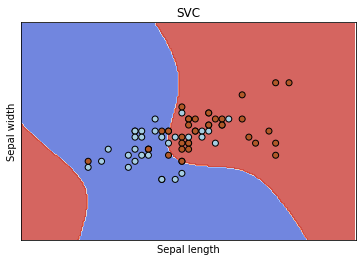

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00         0
  versicolor       0.69      0.73      0.71        15
   virginica       0.71      0.67      0.69        15

   micro avg       0.70      0.70      0.70        30
   macro avg       0.47      0.47      0.47        30
weighted avg       0.70      0.70      0.70        30



In [57]:

X_svmp2_train,X_svmp2_test,Y_svmp2_train,Y_svmp2_test=train_test_split(X_svmp2,Y_svmp2,test_size=0.3)

plot_svc(X_svmp2_train, X_svmp2_test, Y_svmp2_train, Y_svmp2_test, C = 1000 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


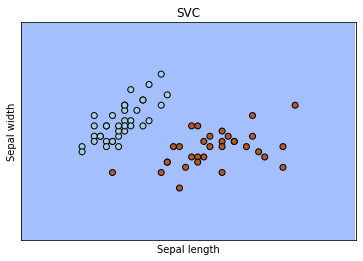

              precision    recall  f1-score   support

      setosa       0.40      1.00      0.57        12
  versicolor       0.00      0.00      0.00         0
   virginica       0.00      0.00      0.00        18

   micro avg       0.40      0.40      0.40        30
   macro avg       0.13      0.33      0.19        30
weighted avg       0.16      0.40      0.23        30



In [60]:

X_svmp3_train,X_svmp3_test,Y_svmp3_train,Y_svmp3_test=train_test_split(X_svmp3,Y_svmp3,test_size=0.3)

plot_svc(X_svmp3_train, X_svmp3_test, Y_svmp3_train, Y_svmp3_test, C = 0.001 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


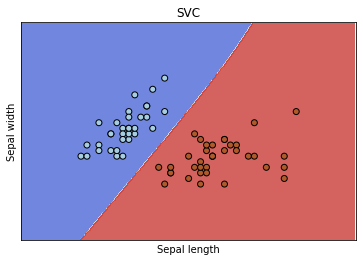

              precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        17
  versicolor       0.00      0.00      0.00         0
   virginica       1.00      0.92      0.96        13

   micro avg       0.97      0.97      0.97        30
   macro avg       0.65      0.64      0.64        30
weighted avg       0.97      0.97      0.97        30



In [61]:

X_svmp3_train,X_svmp3_test,Y_svmp3_train,Y_svmp3_test=train_test_split(X_svmp3,Y_svmp3,test_size=0.3)

plot_svc(X_svmp3_train, X_svmp3_test, Y_svmp3_train, Y_svmp3_test, C = 1 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


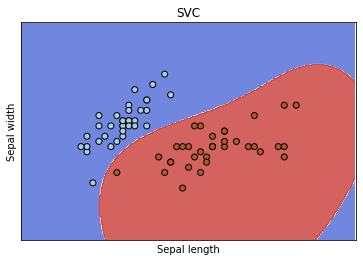

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.00      0.00      0.00         0
   virginica       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        30
   macro avg       0.67      0.67      0.67        30
weighted avg       1.00      1.00      1.00        30



In [62]:

X_svmp3_train,X_svmp3_test,Y_svmp3_train,Y_svmp3_test=train_test_split(X_svmp3,Y_svmp3,test_size=0.3)

plot_svc(X_svmp3_train, X_svmp3_test, Y_svmp3_train, Y_svmp3_test, C = 1000 , title = 'SVC', kernel='rbf',species_labels = [0,1,2], species_names = ['setosa', 'versicolor', 'virginica'])